# Homework 4
## Shannon Dow

### Problem 2: 
After applying the Backward Euler Method, we get: 
$$  U^n = (I-  \frac{k}{2h^2}B)U^{n+1} $$
We want to use the initial condition we will use: 
$$\eta(x) = e^{-20(x-1/2)^2}$$

In [1]:
#import Pkg; Pkg.add("Polynomials")
using LinearAlgebra, Plots, Printf, LaTeXStrings

In [2]:
h = k = 0.001
s = 2
m = convert(Int64,1/h)-1;
# Create B: 
B = SymTridiagonal(fill(-2.0,m),fill(1.0,m-1))
B = convert(Array,B)
B[1,1] = B[1,1]+(s/(s+1));
B[m,m] = B[m,m]+(1/(s+1));
B[1,m] = (s/(s+1));
B[m,1] = (1/(s+1));
Bi = I - (k/(2*h^2))*B;

In [3]:
# Initial Condition:
η = x -> exp.(-20*(x .-1/2).^2)

#3 (generic function with 1 method)

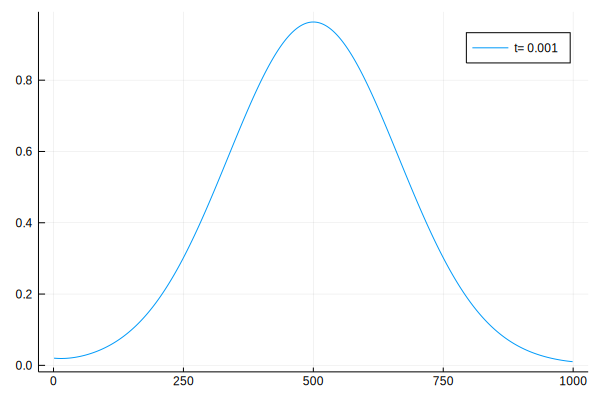

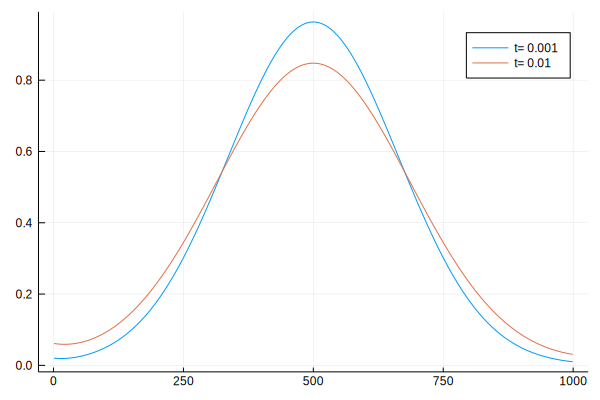

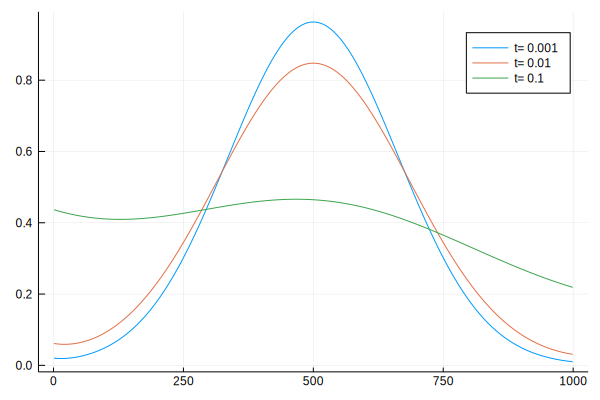

In [4]:
T = [0.001,0.01,0.1]
for tt in T
    #n = convert(Int64,ceil(tt/k))
    x = h:h:1-h
    U = η(x)
    t = 0.0
    while t<=tt
        t += k
        U = Bi\U
    end
    nam = string("t= ",repr(tt));
    plot!(U,label = nam )|>display
end

### Problem 3: 
 $$\frac{1}{N} \sum_{j=1}^N \frac{1}{\sqrt{2 \pi t}} \exp \left( - \frac{(x - X_j)^2}{2t} \right)$$

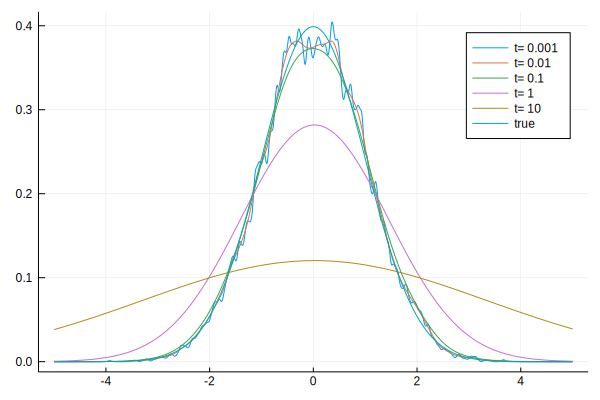

In [5]:
n = 10000;
XX = randn(n)|> Array
x = LinRange(-5,5,n)|> Array
y1 = zeros(n)
y2 = zeros(n)
y3 = zeros(n)
y4 = zeros(n)
y5 = zeros(n)
t = [0.001,0.01,0.1,1,10];
function getf(x, XX, t, n)
    sum = 0.0;
    for j=1:n 
        sum =sum+ 1/sqrt(2*pi*t)*exp(-(x-XX[j])^2/(2*t));           
    end
    sum = (1/n)*sum 
end
for i =1:n
    y1[i] = getf(x[i],XX,t[1],n)
    y2[i] = getf(x[i],XX,t[2],n)
    y3[i] = getf(x[i],XX,t[3],n)
    y4[i] = getf(x[i],XX,t[4],n)
    y5[i] = getf(x[i],XX,t[5],n)
end

plot(x,y1, label = "t= 0.001")
plot!(x,y2, label = "t= 0.01")
plot!(x,y3, label = "t= 0.1")
plot!(x,y4, label = "t= 1")
plot!(x,y5, label = "t= 10")

ptrue1= x -> (1/sqrt(2*pi))*exp.(-(x.^2)/2);
plot!(x,ptrue1(x),label = "true")

In [6]:
function prand(m)
  p = x -> -(2.0/3)*x.+4.0/3 .+ .5sin.(2*pi*x)
  B = 1.7
  out = fill(0.,m)
  for j = 1:m
    u = 10.
    y = 0.
    while u >= p(y)/B
      y = rand()
      u = rand()
    end
    out[j] = y
  end
  out     
end

prand (generic function with 1 method)

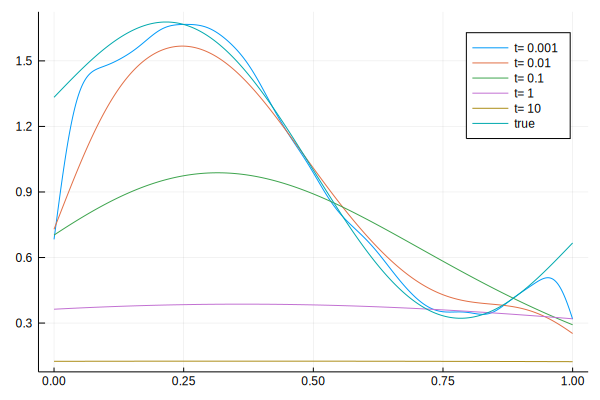

In [7]:
XX = prand(n)|> Array
x = LinRange(0,1,n)|> Array
y1 = zeros(n)
y2 = zeros(n)
y3 = zeros(n)
y4 = zeros(n)
y5 = zeros(n)
t = [0.001,0.01,0.1,1,10];

for i =1:n
    y1[i] = getf(x[i],XX,t[1],n)
    y2[i] = getf(x[i],XX,t[2],n)
    y3[i] = getf(x[i],XX,t[3],n)
    y4[i] = getf(x[i],XX,t[4],n)
    y5[i] = getf(x[i],XX,t[5],n)
end

plot(x,y1, label = "t= 0.001")
plot!(x,y2, label = "t= 0.01")
plot!(x,y3, label = "t= 0.1")
plot!(x,y4, label = "t= 1")
plot!(x,y5, label = "t= 10")

ptrue2 = x -> -(2.0/3)*x.+4.0/3 .+ .5sin.(2*pi*x)
plot!(x,ptrue2(x),label = "true")

### Problem 4: 

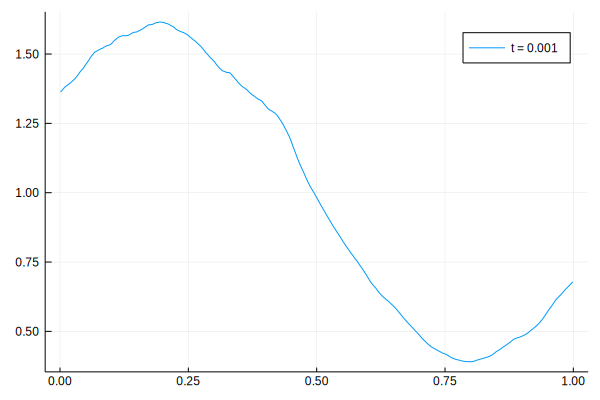

In [8]:
h = 0.001
k = 10*h
s = 2
m = convert(Int64,1/h)-1;
y = zeros(m)
plot(y)
XX = prand(m)|> Array
x = LinRange(0,1,m)|> Array
for i = 1:m
    for j = 1:m
        if XX[j]>= x[i] && XX[j]<x[i+1]
            y[i]+=1;
        end
    end
end
B = SymTridiagonal(fill(-2.0,m),fill(1.0,m-1))
B = convert(Array,B)
B[1,1] = B[1,1]+(s/(s+1));
B[m,m] = B[m,m]+(1/(s+1));
B[1,m] = (s/(s+1));
B[m,1] = (1/(s+1));
Bi = I - (k/(2*h^2))*B;

T = [0.001,0.01,0.1]
x = h:h:1-h
function backEul(x,uo,B,tt,k)
    U = uo
    t = 0.0
    iter = 0
    while t<=tt
        t += k
        U = B\U
        iter += iter
    end
    return U
    println(iter)|> display
end
uo = y/(h*m)
U1 = backEul(x,uo,Bi,T[1],k)


plot(x,U1,label ="t = 0.001")


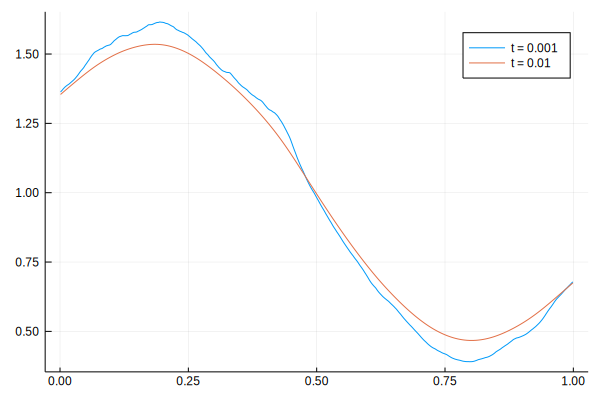

In [9]:
U2 = backEul(x,uo,Bi,T[2],k)
plot!(x,U2,label = "t = 0.01")


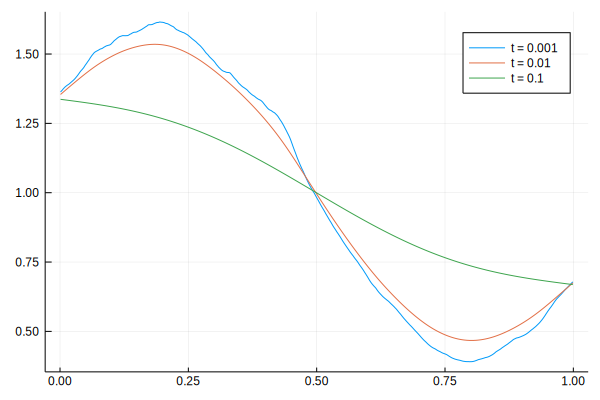

In [10]:
U3 = backEul(x,uo,Bi,T[3],k)
plot!(x,U3, label = "t = 0.1")

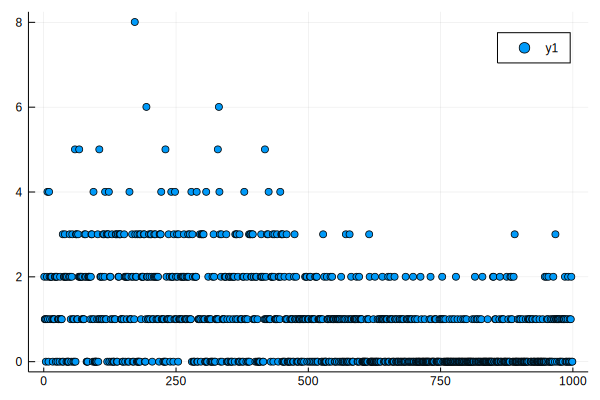

In [11]:
scatter(uo)